# Linear Regression with Pytorch model
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward propagation: compute prdiction
    - backward propagation: gradients
    - update weights

epoch: 100, loss = 559.3873
epoch: 200, loss = 342.4002
epoch: 300, loss = 333.0018
epoch: 400, loss = 332.5869
epoch: 500, loss = 332.5685


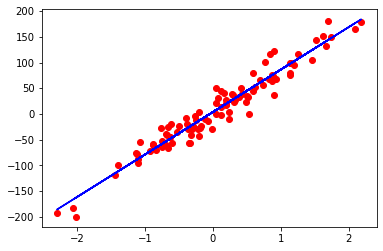

In [8]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
 
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 500
for epoch in range(num_epochs):
    # forward propagation and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward propagation
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) %100 ==0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()